# Guided Project: Predicting Car Prices
## Compiled By: Dana Hagist

In my most recent Dataquest course, we explored the fundamentals of machine learning using the k-nearest neighbors algorithm. In this guided project, we'll practice the machine learning workflow we've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. We can read more about the data set https://archive.ics.uci.edu/ml/datasets/automobile and can download it directly from https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data. 

Task(s):

- Read imports-85.data into a dataframe named cars. If you read in the file using pandas.read_csv() without specifying any additional parameter values, you'll notice that the column names don't match the ones in the dataset's documentation. Why do you think this is and how can you fix this?
- Determine which columns are numeric and can be used as features and which column is the target column.
- Display the first few rows of the dataframe and make sure it looks like the data set preview.

In [6]:
# Import Pandas and Numpy
import pandas as pd
import numpy as np

# Specify maximum number of columns to display
pd.options.display.max_columns = 99

In [7]:
# Reading in the dataset
cars = pd.read_csv('imports-85.data')

# Previewing dataset
cars.head(1)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


After reading in the dataset, we immediately notice that there is an issue... that is, the dataset has no header row (with our column names).  As such, we will need to grab the column names from the documentation and add those to our dataframe.

In [8]:
# Defining column names from dataset documentation:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 
        'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height',
        'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
        'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Reading in dataset a second time, with above columns as column names
cars = pd.read_csv('imports-85.data', names = cols)

# Previewing first row again
cars.head(1)

# Selecting only continuous value columns
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 
                          'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 
                          'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
 
# Changing dataset to only include the above columns    
num_cars = cars[continuous_values_cols]

# Previewing new dataset
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

As we learned in this course, we usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale(https://en.wikipedia.org/wiki/Feature_scaling#Rescaling) the values in the numeric columns so they all range from 0 to 1.

Task(s):

- Use the DataFrame.replace() method to replace all of the ? values with the numpy.nan missing value.
- Because ? is a string value, columns containing this value were cast to the pandas object data type (instead of a numeric type like int or float). After replacing the ? values, determine which columns need to be converted to numeric types. You can use either the DataFrame.astype() or the Series.astype() methods to convert column types.
- Return the number of rows that have a missing value for the normalized-losses column. Determine how you should handle this column. You could:
    - Replace the missing values using the average values from that column.
    - Drop the rows entirely (especially if other columns in those rows have missing values).
    - Drop the column entirely.
- Explore the missing value counts for the other numeric columns and handle any missing values.
- Of the columns you decided to keep, normalize the numeric ones so all values range from 0 to 1.

In [9]:
# Replacing all '?' with NaN (Not a Number)
num_cars = num_cars.replace('?', np.nan)

# Converting all columns to float
num_cars = num_cars.astype('float')

# Checking to determine number of null values
num_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [10]:
# Dropping columns with missing 'price' values
num_cars = num_cars.dropna(subset=['price'])

# Checking number of nulls again after dropping above
num_cars.isnull().sum()

# Can see below that 4 of the rows with null 'normalized-losses were dropped'

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [11]:
# Converting all other null values to means for those columns
num_cars = num_cars.fillna(num_cars.mean())

# Checking null values once more
num_cars.isnull().sum()

# Can see below that no more null values exist

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
# Setting aside 'price' column because we don't want to normalize
price_col = num_cars['price']

# Normalizing remaining columns/ rows to range(0,1)
num_cars = (num_cars - num_cars.min()) / (num_cars.max() - num_cars.min())

# Resetting 'price' to top line in this cell
num_cars['price'] = price_col

# Previewing new dataset
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Creating Univariate Models

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure the code workflow and understand the features better.

Task(s):
- Create a function, named knn_train_test() that encapsulates the training and simple validation process. This function should have 3 parameters -- training column name, target column name, and the dataframe object.
    - This function should split the data set into a training and test set.
    - Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
    - Finally, it should calculate the RMSE and return that value.
- Use this function to train and test univariate models using the different numeric columns in the data set. Which column performed the best using the default k value?
- Modify the knn_train_test() function you wrote to accept a parameter for the k value.
    - Update the function logic to use this parameter.
    - For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9). Visualize the results using a scatter plot or a line plot.



In [14]:
# Importing requisite libraries for these tasks
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [33]:
# Creating basic knn function
def knn_train_test(train_col, target_col, df):
    # Instantiate KNeighborsRegressor class
    knn = KNeighborsRegressor()
    
    # Set random seed
    np.random.seed(1)
    
    # Randomize row ordering in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Dividing data frame in half for train/test sets
    last_train_row = int(len(rand_df)/2)
    
    # Splitting first half as train and second half as test
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fitting the training model with the default k-value
    knn.fit(train_df[[train_col]], train_df[target_col])

    # Making predictions on test set
    predictions = knn.predict(test_df[[train_col]])
    
    # Calculating MSE and RMSE
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = num_cars.columns.drop('price')

# For eaching training column, training a model, and returning RMSE
# Adding RMSE value to the RMSE results dictionary
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', num_cars)
    rmse_results[col] = rmse_val
    
# Creating a series object from the dictionary above
# Allows us to easily view, sort, etc.
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [39]:
# Modifying knn_train_test() to take in k-value
def knn_train_test(train_col, target_col, df):
        np.random.seed(1)
        
        # Randomize row order in data frame
        shuffled_index = np.random.permutation(df.index)
        rand_df = df.reindex(shuffled_index)
        
        # Divide number of rows in half and round
        last_train_row = int(len(rand_df) / 2)
        
        # Select the first half and set as training set
        # Select second half and set as test set
        train_df = rand_df.iloc[0:last_train_row]
        test_df = rand_df.iloc[last_train_row:]
        
        # Establishing list of k-values from instructions
        k_values = [1,3,5,7,9]
        k_rmses = {}
        
        # Looping through k-values and training models
        for k in k_values:
            knn = KNeighborsRegressor(n_neighbors = k)
            knn.fit(train_df[[train_col]], train_df[target_col])
            
            # Predicting on test set
            predictions = knn.predict(test_df[[train_col]])
            
            # Calculating and predicting MSE and RMSE
            mse = mean_squared_error(test_df[target_col], predictions)
            rmse = np.sqrt(mse)
            
            # Assigning values to dictionary
            k_rmses[k] = rmse
        return k_rmses

# Creating empty dictionary for the rmse results
k_rmse_results = {}

# For each training column, training a model, and returning RMSE value
train_cols = num_cars.columns.drop('price')
for col in train_cols:
    rmse = knn_train_test(col, 'price', num_cars)
    k_rmse_results[col] = rmse
    
k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

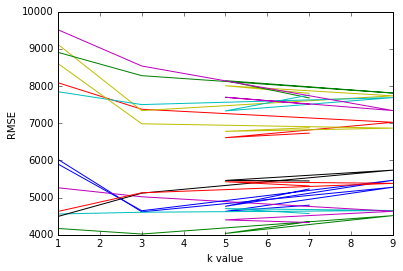

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Creating Multivariate Models

Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns.

Task(s):
- Modify the knn_train_test() function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter:
    - Instead of using just a single column for train and test, use all of the columns passed in.
    - Use a the default k value from scikit-learn for now (we'll tune the k value in the next step).
- Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
- Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
- Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
- Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
- Display all of the RMSE values.

In [41]:
# Compute average RMSE for different k values for each feature
feature_avg_rmse = {}
for k, v in k_rmse_results.items():
        avg_rmse = np.mean(list(v.values()))
        feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [43]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize row order in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df) / 2)
    
    # Selecting first half as train set
    # Selecting second half as test set
    train_df = rand_df[0:last_train_row]
    test_df = rand_df[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Make predicitons on test set
        predictions = knn.predict(test_df[train_cols])
        
        # Calculate MSE and RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', num_cars)
k_rmse_results['two best features'] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', num_cars)
k_rmse_results['three best features'] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', num_cars)
k_rmse_results['four best features'] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg', 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', num_cars)
k_rmse_results['five best features'] = rmse_val

k_rmse_results

{'five best features': {5: 3341.6024539726504},
 'four best features': {5: 3280.3807311630976},
 'three best features': {5: 3305.9401397969677},
 'two best features': {5: 3589.3132622073304}}

## Optimizing Models from Last Step

Let's now optimize the model that performed the best in the previous step.

Task(s):
- For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
- Which k value is optimal for each model? How different are the k values and what do you think accounts for the differences?

In [44]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize row order in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df) / 2)
    
    # Selecting first half for training set
    # Selecting second half for testing set
    train_df = rand_df[0:last_train_row]
    test_df = rand_df[last_train_row:]
    
    k_values = [i for i in range(1,25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors model
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Make predictions on test set
        predictions = knn.predict(test_df[train_cols])
        
        # Calculate MSE and RMSE
        mse = mean_squared_error(test_df['price'], predictions)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', num_cars)
k_rmse_results['three best features'] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', num_cars)
k_rmse_results['four best features'] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', num_cars)
k_rmse_results['five best features'] = rmse_val

k_rmse_results

{'five best features': {1: 2530.0554077602005,
  2: 2897.1757974767684,
  3: 3183.4597426217424,
  4: 3168.0230415758415,
  5: 3341.6024539726504,
  6: 3537.520542998191,
  7: 3817.290452118825,
  8: 4004.414529685573,
  9: 3992.3186041830318,
  10: 4138.728787853335,
  11: 4342.052852829098,
  12: 4416.145381031136,
  13: 4493.8798141857205,
  14: 4463.501601554571,
  15: 4474.480783207805,
  16: 4553.5595362768345,
  17: 4597.001081375769,
  18: 4655.283442648355,
  19: 4687.900893982822,
  20: 4712.022985543165,
  21: 4755.856625823773,
  22: 4788.162720030673,
  23: 4806.923381965054,
  24: 4879.983352195467},
 'four best features': {1: 2516.589279950226,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.269482641261,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.998621362245,
  10: 4042.247226187899,
  11: 4230.335248684068,
  12: 4354.008675154061,
  13: 4461.626664877788,
  14: 4468.029845088927,
  15: 444

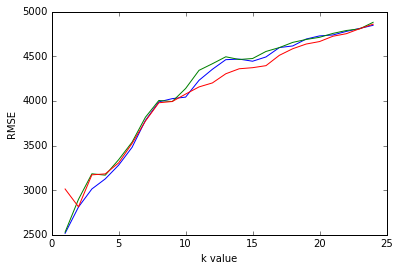

In [45]:
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')